# Exploritory Analysis on SHPO OLI Dataset.
By Kellen Bullock

## Framing the Problem and Big Picture
The OLI is a database that contains roughly 65,000 records. Roughly up to 20,000 of these records are dupliates. Several people have been cleaning the data by hand by indicating poss_dup or good in the duplicate_check field. The State Historical Presvation Office then makes the decision to roll those records off the main table into another. 

In order to make more informed deicsions and queries on the database duplicate records should be taken out. Duplicate create confusion for the users by providing redudent information that the user does not want. 


#### Problem Statement
How can automatic complex duplicate record detection be implemented to prevent more duplicate records from entering the dataset?

#### Proposed solution:
Training a neural network to make a propblistic descision on whether a record is a duplicate or not is far more effeicent than checking every record in the dataset. 

Since several thousand records have been classified already that data will be used for supervised learning. 

#### How to solve this problem manually:
A field such as PROPNAME, ADDRESS or RESNAME are sorted alphabetically. First the PROPNAME fields are compared for similarity. Then ADDRESS, RESNAME, ROOF_TYP, and WINDOW_TYPE. If records matchup the records are marked as poss_dup in the duplicate_check column. 

### Peformance measurment:
A CSV file that contains the OBJECTID and probability score that the classifier assigns will be out. This will be joined with the main table dataset and checked by a person. 

Accuracy measrument: RSME
Recall will also be measrued

If the Classifier can out perform at 85% or higher I will call it a success. 

# Assumptions:
<ul>
    <li> The data has complete records, there are no misspelling in the data, There is a combination of numerical, text, and catagorical values. </li>
    <li> The people classifying the records as duplicates are very accurate. 92% accurate or higher.</li>
    <li>

#### Overall project
Title what attempt this is to differintate models.
We will use brnaching in git to help us develop.

#### Toolset
<ul>
    <li>Jupyter notebooks will be for data exploration and visziulation</li>
    <li>Tensorboard will be used for accuracy analysis and cost.</li>
</ul>

#### Notes for Table of Contents:
Establish sections
Enable hyperlinks

#### Put this into the README.md file:
## Objectives:
<ol>
    <li>Name attributes and describe characteristics.</li>
    <ul>
        <li>% of Nulls</li>
        <li>Type of data. ie String, int, float</li>
        <li>Noise present. Such as outliers, logistic, rounding errors</li>
        <li>What is useful what isn't and why</li>
        <li>Type of distribution. </li>
    </ul>
    <li>Identifying Label data</li>
    <li>Visualization of data</li>
    <li>Identify correlations between variables</li>
    <li>Propose how the problem would be solved manually</li>
    <li>Provide transformations if nessiary</li>
    <li>Anything else of interest</li>
</ol>

## Exploritory data Strategy
The nature of the dataset is complex. This is due to the descriptive attirbutes assocatied with properites and cemetaries. There are only a couple of real numerical datatypes such as lat and long. I intend to go through each type figuring out if it is catagorical, a string/text, or numerical. Once the catagroies are identified applying a numerical number scheme for them will be adopted. 

### Questions:
Can I even descrptive statstics on catagorical data? From Comer's class I remember there beng some very strang things that happened.
What do I even do with the catagorical data?

#### Data cleaning Strats:
I could take all null values and fill them with <b>No Data</b>. This would allow for complete records and give vectors to data that isn't there. In turn allowing for the whole record to be proccessed.
<b>I really think this should be prsued, because of the amount of null records there are.</b>
Drawbacks:
    I am creating data and altering data that is in the database. I would have to make general enough preproccessing to catch all of the null or missing values too. Then the model could train but if I miss something it could crash horribily and not really tell me why. Or I could get a very poor level of accuracy. 
    
Implementation:
   <ol>
    <li>Look at all columns and identify incompletes</li>
    <li>Do an fillna() where possible</li>
    <li>Some catagorical data has 00 or none and that would need to change</li>
    <li>Run info() again to see what pandas says.</li>
    <li>Visiually inspect data</li>
   </ol>


# Models
<ol>
    <li>Turn everything into text and concatenate all attributes into one string, apply TF-IDF and cosine similarity, then run model.</li>
    <ul>
        <li><b>Notes</b></li>
        <ul>
            <li>I do not know how and if I need to do describptive stats on the vectors of the strings</li>
        </ul>
    </ul>
    <li>Exploritiory driven modeling</li>
    <ul>
        <li>Convert individual columns into vectors</li>
        <li>PCA (principle compoent analysis vectors and drop relivant columns</li>
        <li>Train model</li>
    </ul>
    <li>Find complete records.</li>
        <ul>
            <li>After discovering complete fields do prepoccessing and run model just on those.</li>
            <li>This strategy will probably not work on the whole dataset becuase there are so many null.</li>
        </ul>
    <li><b>Implement One Hot Encoder instead of TD-IDF.</b></li>
    <ul>
        <li>Problems I forsee with doing this method are there are a lot of nominal values that are misspelled. They create a whole new catagory which will add more complexity to the model. It might not generalize well to new data. For example if we OneHotEncode Oklahoma and Olahoma (county) we create two different catagories. (Contrasting with the TD-IDF method): We are creating vectors based on occurance of important words within the corpus. Okay it seems it may have the same effect.</li>
        <li>This continues to prove that a massive data cleaning proccess needs to be done on the dataset or I need to cherry pick good records out of the dataset.</li>
    </ul>
    

#### Importing modules

In [24]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
import sys

sys.path.append('data_tools')

%matplotlib inline
plt.rcParams["figure.figsize"] = [10,10]
pd.set_option('display.max_columns', 70)
pd.set_option('display.max_rows', 200)

#### Loading dataset in:

In [25]:
df = pd.read_excel('Oklahoma.xls')
df

,OBJECTID,PROPNAME,RESNAME,ADDRESS,CITY,VICINTIY,COUNTYCD,LOT,BLOCK,PLATNAME,SECTION,TOWNSHIP,RANGE,RESTYPE,HIST_FUNC,CURR_FUNC,AREASG_1,AREASG_2,desc_seg,DOC_SOURCE,NAME_PREP,SURVEY_PRO,Projectname,DATE_PREP,PHOTOGRAPH,YEAR,ARCH_BUILD,YEAR_BUILD,ORIG_SITE,DATEMOVED,FROMWHERE,ACCESSIBLE,ARCH_STYLE,OTHER_ARCH,FOUN_MAT,ROOF_TYPE,ROOF_MAT,WALL_MAT_1,WALL_MAT_2,WINDOW_TYP,WINDOW_MAT,DOOR_TYP,DOOR_MAT,EXTER_FEA,INTER_FEA,DEC_DETAIL,CONDITION,DES_RES,COMMENTS,PLACEMENT,lonr,CONTINUATION,NRData,Date_Updated,Lat,Long,UTM_Zone,Easting,Northing,P_B_C,Year_Closed,duplicate_check,duplicate_check_date,duplicate_check_user,duplicate_check_comments,approved_shpo,DATE_ENTERED
0,70161,INFILL HOUSING,INFILL HOUSING,,OKLAHOMA CITY,MEDICAL COMMUNITY,109,2019-02-03 00:00:00,4,GAST HEIGHTS ADDITION,27,12N,3W,B,01A,98,300,0,TUDOR REVIVAL STYLE / ONE STORY STYLE,N/A,RICK DRAPEAU,No,N/A,1999-08-03 00:00:00,Yes,1999,JAMES WILLIAMS,1999,Yes,NaN,NaN,Yes,80,NaN,65,CROSS GABLED COMPOSITION WITH CLIPPED GABLES,63,20,0.0,HUNG,20,WOOD,80,N/A,N/A,NaN,0,NONE,NONE,,No Data,,No Data,2006-03-28 00:00:00,NaN,NaN,NaN,NaN,NaN,P,NaN,good,2019-01-22,NaN,NaN,NaN,NaT
1,73325,STEPHENSON PARK,BRIDGE,,EDMOND,,109,,,,,,,U,16D,16D,30,0,WPA BUILT BRIDGE; NOT ELIGIBLE FOR NATIONAL RE...,,BEVERLY TERRY,No,No Data,2008,Yes,2008,WPA,CA 1936,Yes,,,Yes,80,,42,,0,0,0.0,,0,,0,,,,0,,,,No,,No Data,2009-09-28 00:00:00,35.650410,-97.479530,NaN,,,P,NaN,good,2019-01-22,NaN,NaN,NaN,NaT
2,73327,STEPHENSON PARK,PICNIC AREA,,EDMOND,,109,,,,,,,U,8,8,120,0,NOT ELIGIBLE FOR NATIONAL REGISTER,,BEVERLY TERRY,No,No Data,2008,Yes,2008,UNKNOWN,CA 1960,Yes,,,Yes,80,,65,HIPPED,20,0,0.0,,0,,0,,,,2,WOODEN PICNIC PAVILION,,,No,,No Data,2009-09-28 00:00:00,35.650410,-97.479530,NaN,,,P,NaN,good,2019-01-22,NaN,NaN,NaN,NaT
3,73329,STEPHENSON PARK,CROQUET COURT,,EDMOND,,109,,,,,,,S,8,8,120,0,HISTORIC RECREATIONAL FACILITY; NOT ELIGIBLE F...,,BEVERLY TERRY,No,No Data,2008,Yes,2008,UNKNOWN,1932,Yes,,,Yes,80,,0,,0,0,0.0,,0,,0,,,,2,"ORIGINALLY A CROQUET COURT BUILT IN 1932, THE ...",,,No,,No Data,2009-09-28 00:00:00,35.650410,-97.479530,NaN,,,P,NaN,good,2019-01-22,NaN,NaN,NaN,NaT
4,73330,STEPHENSON PARK,TENNIS COURTS,,EDMOND,,109,,,,,,,U,8,8,120,0,HISTORIC TENNIS COURTS; NOT ELIGIBLE FOR THE N...,,BEVERLY TERRY,No,No Data,2008,Yes,2008,UNKNOWN,1932,No Data,,,No Data,0,Not Applicable,0,,0,0,0.0,,0,,0,,,,0,,,,No,,No Data,2009-09-28 00:00:00,35.650410,-97.479530,NaN,,,P,NaN,good,2019-01-22,NaN,NaN,NaN,NaT
5,73332,STEPHENSON PARK,CHILDRENS PLAY AREA,,EDMOND,,109,,,,,,,S,8,8,120,0,NOT ELIGIBLE FOR THE NATIONAL REGISTER,,BEVERLY TERRY,No,No Data,2008,Yes,2008,UNKNOWN,1955-57,Yes,,,Yes,80,,0,,0,0,0.0,,0,,0,,,,0,CHILDREN'S PLAY AREA FUNDED BY THE CITY OF EDM...,,,No,,No Data,2009-09-28 00:00:00,35.650410,-97.479530,NaN,,,P,NaN,good,2019-01-22,NaN,NaN,NaN,NaT
6,73335,STEPHENSON PARK,MEMORIAL PARK AREA,,EDMOND,,109,,,,,,,S,8,8,120,0,NOT ELIGIBLE FOR THE NATIONAL REGISTER,,BEVERLY TERRY,No,No Data,2008,Yes,2008,UNKNOWN,UNCOLLECTED,Yes,,,Yes,0,Not Applicable,0,,0,0,0.0,,0,,0,,,,0,MEMORIAL AREA PAVED WITH ENGRAVED BRICKS; AREA...,,,No,,No Data,2009-09-28 00:00:00,35.650410,-97.479530,NaN,,,P,NaN,good,2019-01-22,NaN,NaN,NaN,NaT
7,76164,1829 MANSFIELD AVE,1829 MANSFIELD AVE,1829 MANSFIELD AVE,DEL CITY,,109,8,3,MANSFIELD ADDITION,,,,B,01A,01A,30,0,,,DAVID ASH,No,No Data,2002-09-03 00:00:00,Yes,2002,UNKNOWN,1947,Yes,,,Yes,80,RANCH 1 STORY,65,ASPHALT,61,0,0.0,1/1 HUNG,55,PANELED,20,,,,4,"1 STORY RANCH, COMP ROOF, STUCCO EXTERIOR",,,No Data,,No Data,2010-01-29 00:00:00,35.446890,-97.454790,NaN,,,P,NaN,good,2019-01-22,NaN,NaN,NaN,NaT
8,89707,OKLAHOMA CITY INTENSIVE LEVEL SURVEY PHASE 3,1015 NORTH SHARTEL AVENUE,1015 NORTH SHARTEL AVENUE,OKLAHOMA CITY,NaN,109,35,1,NaN,33,12N,3W,B,NaN,12D,0,0,THE PROPERTY DOES NOT FALL WITHIN THE BOUNDARI...,OKLAHOMA CITY SANBORN FIRE INSURANCE MAPS 1922...,E. HOWARD/K. SINGLETON,No,NaN,2011-07-18 00:00:00,Yes,2011,UNKNOWN,1976,Yes,NaN,NaN,Yes,1,Not Applicable,65,FLAT,70,30,0.0,FIXED,50,GLAZED PANEL,50,B

# What is each Field?

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3950 entries, 0 to 3949
Data columns (total 67 columns):
OBJECTID                    3950 non-null int64
PROPNAME                    3946 non-null object
RESNAME                     3935 non-null object
ADDRESS                     3950 non-null object
CITY                        3950 non-null object
VICINTIY                    3122 non-null object
COUNTYCD                    3950 non-null int64
LOT                         3881 non-null object
BLOCK                       3877 non-null object
PLATNAME                    3896 non-null object
SECTION                     3931 non-null object
TOWNSHIP                    3930 non-null object
RANGE                       3929 non-null object
RESTYPE                     3950 non-null object
HIST_FUNC                   3949 non-null object
CURR_FUNC                   3950 non-null object
AREASG_1                    3950 non-null int64
AREASG_2                    3950 non-null object
desc_seg      

In [27]:
full = ['ObjectID','Address','City','CountyCD','Restype','Curr_func','Curr_func','Areasg_1','Areasg_2','Name_prep',
       'Survey_Pro','Photograph','Orig_site','Accesible','Arch_style','Foun_mat','Roof_Mat','Wall_Mat_1','Window_Mat',
       'Door_mat','Condition','P_B_C','duplicate_check']
# 22 fields are complete in this dataset.

In [28]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [29]:
df.fillna(value='No Data',inplace=True)

In [30]:
df

,OBJECTID,PROPNAME,RESNAME,ADDRESS,CITY,VICINTIY,COUNTYCD,LOT,BLOCK,PLATNAME,SECTION,TOWNSHIP,RANGE,RESTYPE,HIST_FUNC,CURR_FUNC,AREASG_1,AREASG_2,desc_seg,DOC_SOURCE,NAME_PREP,SURVEY_PRO,Projectname,DATE_PREP,PHOTOGRAPH,YEAR,ARCH_BUILD,YEAR_BUILD,ORIG_SITE,DATEMOVED,FROMWHERE,ACCESSIBLE,ARCH_STYLE,OTHER_ARCH,FOUN_MAT,ROOF_TYPE,ROOF_MAT,WALL_MAT_1,WALL_MAT_2,WINDOW_TYP,WINDOW_MAT,DOOR_TYP,DOOR_MAT,EXTER_FEA,INTER_FEA,DEC_DETAIL,CONDITION,DES_RES,COMMENTS,PLACEMENT,lonr,CONTINUATION,NRData,Date_Updated,Lat,Long,UTM_Zone,Easting,Northing,P_B_C,Year_Closed,duplicate_check,duplicate_check_date,duplicate_check_user,duplicate_check_comments,approved_shpo,DATE_ENTERED
0,70161,INFILL HOUSING,INFILL HOUSING,No Data,OKLAHOMA CITY,MEDICAL COMMUNITY,109,2019-02-03 00:00:00,4,GAST HEIGHTS ADDITION,27,12N,3W,B,01A,98,300,0,TUDOR REVIVAL STYLE / ONE STORY STYLE,N/A,RICK DRAPEAU,No,N/A,1999-08-03 00:00:00,Yes,1999,JAMES WILLIAMS,1999,Yes,No Data,No Data,Yes,80,No Data,65,CROSS GABLED COMPOSITION WITH CLIPPED GABLES,63,20,0,HUNG,20,WOOD,80,N/A,N/A,No Data,0,NONE,NONE,No Data,No Data,No Data,No Data,2006-03-28 00:00:00,No Data,No Data,No Data,No Data,No Data,P,No Data,good,2019-01-22,No Data,No Data,No Data,No Data
1,73325,STEPHENSON PARK,BRIDGE,No Data,EDMOND,No Data,109,No Data,No Data,No Data,No Data,No Data,No Data,U,16D,16D,30,0,WPA BUILT BRIDGE; NOT ELIGIBLE FOR NATIONAL RE...,No Data,BEVERLY TERRY,No,No Data,2008,Yes,2008,WPA,CA 1936,Yes,No Data,No Data,Yes,80,No Data,42,No Data,0,0,0,No Data,0,No Data,0,No Data,No Data,No Data,0,No Data,No Data,No Data,No,No Data,No Data,2009-09-28 00:00:00,35.6504,-97.4795,No Data,No Data,No Data,P,No Data,good,2019-01-22,No Data,No Data,No Data,No Data
2,73327,STEPHENSON PARK,PICNIC AREA,No Data,EDMOND,No Data,109,No Data,No Data,No Data,No Data,No Data,No Data,U,8,8,120,0,NOT ELIGIBLE FOR NATIONAL REGISTER,No Data,BEVERLY TERRY,No,No Data,2008,Yes,2008,UNKNOWN,CA 1960,Yes,No Data,No Data,Yes,80,No Data,65,HIPPED,20,0,0,No Data,0,No Data,0,No Data,No Data,No Data,2,WOODEN PICNIC PAVILION,No Data,No Data,No,No Data,No Data,2009-09-28 00:00:00,35.6504,-97.4795,No Data,No Data,No Data,P,No Data,good,2019-01-22,No Data,No Data,No Data,No Data
3,73329,STEPHENSON PARK,CROQUET COURT,No Data,EDMOND,No Data,109,No Data,No Data,No Data,No Data,No Data,No Data,S,8,8,120,0,HISTORIC RECREATIONAL FACILITY; NOT ELIGIBLE F...,No Data,BEVERLY TERRY,No,No Data,2008,Yes,2008,UNKNOWN,1932,Yes,No Data,No Data,Yes,80,No Data,0,No Data,0,0,0,No Data,0,No Data,0,No Data,No Data,No Data,2,"ORIGINALLY A CROQUET COURT BUILT IN 1932, THE ...",No Data,No Data,No,No Data,No Data,2009-09-28 00:00:00,35.6504,-97.4795,No Data,No Data,No Data,P,No Data,good,2019-01-22,No Data,No Data,No Data,No Data
4,73330,STEPHENSON PARK,TENNIS COURTS,No Data,EDMOND,No Data,109,No Data,No Data,No Data,No Data,No Data,No Data,U,8,8,120,0,HISTORIC TENNIS COURTS; NOT ELIGIBLE FOR THE N...,No Data,BEVERLY TERRY,No,No Data,2008,Yes,2008,UNKNOWN,1932,No Data,No Data,No Data,No Data,0,Not Applicable,0,No Data,0,0,0,No Data,0,No Data,0,No Data,No Data,No Data,0,No Data,No Data,No Data,No,No Data,No Data,2009-09-28 00:00:00,35.6504,-97.4795,No Data,No Data,No Data,P,No Data,good,2019-01-22,No Data,No Data,No Data,No Data
5,73332,STEPHENSON PARK,CHILDRENS PLAY AREA,No Data,EDMOND,No Data,109,No Data,No Data,No Data,No Data,No Data,No Data,S,8,8,120,0,NOT ELIGIBLE FOR THE NATIONAL REGISTER,No Data,BEVERLY TERRY,No,No Data,2008,Yes,2008,UNKNOWN,1955-57,Yes,No Data,No Data,Yes,80,No Data,0,No Data,0,0,0,No Data,0,No Data,0,No Data,No Data,No Data,0,CHILDREN'S PLAY AREA FUNDED BY THE CITY OF EDM...,No Data,No Data,No,No Data,No Data,2009-09-28 00:00:00,35.6504,-97.4795,No Data,No Data,No Data,P,No Data,good,2019-01-22,No Data,No Data,No Data,No Data
6,73335,STEPHENSON PARK,MEMORIAL PARK AREA,No Data,EDMOND,No Data,109,No Data,No Data,No Data,No Data,No Data,No Data,S,8,8,120,0,NOT ELIGIBLE FOR THE NATIONAL REGISTER,No Data,BEVERLY TERRY,No,No Data,2008,Yes,2008,UN

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3950 entries, 0 to 3949
Data columns (total 67 columns):
OBJECTID                    3950 non-null int64
PROPNAME                    3950 non-null object
RESNAME                     3950 non-null object
ADDRESS                     3950 non-null object
CITY                        3950 non-null object
VICINTIY                    3950 non-null object
COUNTYCD                    3950 non-null int64
LOT                         3950 non-null object
BLOCK                       3950 non-null object
PLATNAME                    3950 non-null object
SECTION                     3950 non-null object
TOWNSHIP                    3950 non-null object
RANGE                       3950 non-null object
RESTYPE                     3950 non-null object
HIST_FUNC                   3950 non-null object
CURR_FUNC                   3950 non-null object
AREASG_1                    3950 non-null int64
AREASG_2                    3950 non-null object
desc_seg      

# Unique Fields

Below is a custom made function designed to display unique values in the dataset all in one table. 

In [32]:
from uniques import uniques

In [33]:
uni = uniques(df)
uni.replace(r'^\s*$', np.nan, regex=True)
uni.fillna('')

,CITY,VICINTIY,COUNTYCD,TOWNSHIP,RANGE,RESTYPE,HIST_FUNC,AREASG_1,AREASG_2,SURVEY_PRO,PHOTOGRAPH,ORIG_SITE,DATEMOVED,FROMWHERE,ACCESSIBLE,ARCH_STYLE,OTHER_ARCH,FOUN_MAT,ROOF_MAT,WALL_MAT_1,WALL_MAT_2,WINDOW_MAT,DOOR_MAT,CONDITION,lonr,NRData,UTM_Zone,P_B_C,Year_Closed,duplicate_check,duplicate_check_date,duplicate_check_user,approved_shpo,DATE_ENTERED
0,OKLAHOMA CITY,MEDICAL COMMUNITY,109,12N,3W,B,01A,300,0,No,Yes,Yes,No Data,No Data,Yes,80,No Data,65,63,20,0,20,80,0,No Data,No Data,No Data,P,No Data,good,2019-01-22T00:00:00.000000000,No Data,No Data,No Data
1,EDMOND,No Data,,No Data,No Data,U,16D,30,10,Yes,No,No Data,?,MIDWEST CITY,No Data,0,Not Applicable,42,0,0,40,0,0,2,No,71001081,14,C,,pos_dup,2019-01-23T00:00:00.000000000,,,2018-07-27 00:00:00
2,EDMOND,BRICKTOWN,,14N,2W,S,8,120,30,No Data,No Data,No,CA 1950,RURAL AREA,No,1,RANCH 1 STORY,0,20,30,80,55,20,4,Yes,1983-08-12 00:00:00,,,,,2019-01-24T00:00:00.000000000,,,2018-10-16 00:00:00
3,DEL CITY,V,,11N,1W,0,No Data,0,160,,,,C. 1993,UNKNOWN,,70,CONTEMPORARY,98,61,55,20,50,50,3,Eligible,82004854,,,,,2019-01-25T00:00:00.000000000,,,2018-10-23 00:00:00
4,MIDWEST CITY,N/,,13N,R4W,O,02B,200,250,,,,1958,OAK STREET,,81,NEW TRADITIONAL CRAFTSMAN,99,70,98,98,98,44,1,,1979-10-10 00:00:00,,,,,2019-01-30T00:00:00.000000000,,,2018-07-18 00:00:00
5,JONES,Y,,T16N,2W (IM),,99,50,50,,,,UNKNOWN,99 UNCOLLECTED,,73,RANCH,30,99,72,1,99,98,5,,1000657,,,,,2019-05-29T00:00:00.000000000,,,2018-11-30 00:00:00
6,OKLAHOMA CITY,N/A,,T12N,R3W,,9,160,70,,,,1953,,,62,MINIMAL TRADITIONAL,40,98,42,68,56,99,,,16000374,,,,,2019-06-23T00:00:00.000000000,,,2018-12-07 00:00:00
7,OKLAHOMA,N.W. 1ST AND WESTERN AVE.,,99 UNCOLLECTED,99 UNCOLLECTED,,10D,280,UNK,,,,N/A,,,65,PYRAMIDAL FAMILY,61,50,65,65,72,55,,,2000176,,,,,2019-06-26T00:00:00.000000000,,,
8,MIDWEST CITY,NW 1ST AND WESTERN AVENUE,,T11N,3,,2,70,220,,,,1923,,,55,PYRAMID FAMILY,20,65,21,22,40,68,,,1980-09-08 00:00:00,,,,,2019-06-27T00:00:00.000000000,,,
9,OKALHOMA CITY,LUTHER,,T14N,4W,,03C,40,280,,,,99 UNCOLLECTED,,,33,POSTWAR SUBURBAN,51,22,50,42,68,56,,,88662,,,,,2019-06-28T00:00:00.000000000,,,


In [34]:
df.CITY.unique()

array(['OKLAHOMA CITY', 'EDMOND', ' EDMOND', ' DEL CITY', 'MIDWEST CITY',
       'JONES', 'OKLAHOMA CITY ', 'OKLAHOMA', 'MIDWEST CITY ',
       'OKALHOMA CITY', 'MIDWEST CITY CITY', 'LUTHER', 'NICOMA PARK',
       'OLAHOMA CITY', 'CHOCTAW', 'OKlAHOMA CITY', 'OKLHOMA CITY',
       'DEL CITY', 'HARRAH'], dtype=object)

The code above does exactly what the table does. As you can see there are multiple errors in the spelling. With no standard of naming was used.

In [35]:
# Sort alphabetical

In [36]:
len(df.CITY.unique().tolist())

19

## Catagorical distribution:
### Check seaborn for nice plots for distrivution and nice stats

Included in this section are:
<ul>
    <li>Counts for catagorical values</li>
    <li>Distribution of counts</li>
</ul>

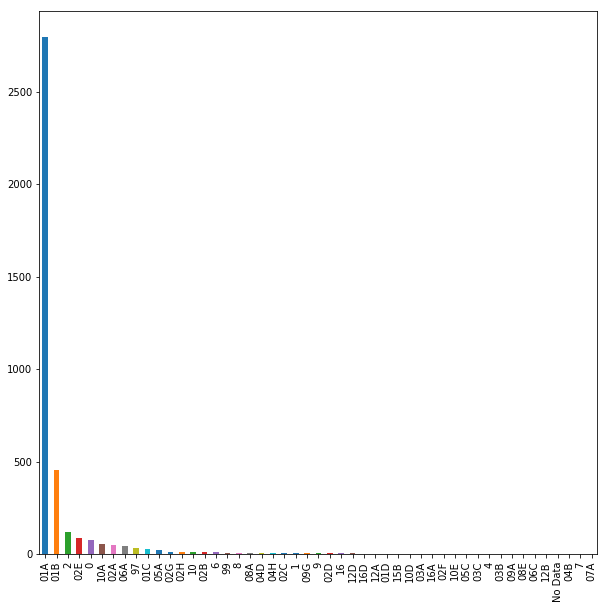

In [37]:
df['HIST_FUNC'].value_counts().plot(kind='bar')

Above is Field name, number of filled values, and the type of data contained in each field. We can see that there are very few complete columns. Meaning 3950/3950. This is further complicated by having 67 columns. There are probably no complete records in this dataset. 

What this whole thing is for is developing a classifier. 

### More questions
<ul>
    <li>If I train on data without nulls will that model generalize with input data that has nulls?</li>
    <li>Is there anyway to fill in the data that has nulls?</li>
    <li>How am I going to deal with this?</li>
</ul>

In [39]:
df.HIST_FUNC.unique()
len(df.HIST_FUNC.unique().tolist())

49

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2174b358>]],
      dtype=object)

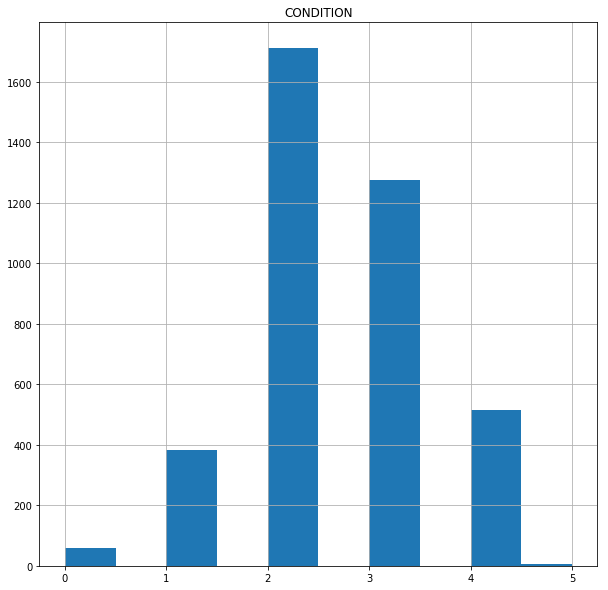

In [40]:
df.hist(column=['CONDITION'])